<b><h2><center>Supervised Learning Project for predicting car price</center></h2></b>
<center><img src="https://www.pngitem.com/pimgs/m/224-2244535_used-car-center-used-cars-hd-png-download.png" width="800" height="400"></center>

# Cars4u - Project

## Context
There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it.

## Objective

To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.

## Key questions to be answered:

* What are the factors influence the price of the cars?
* Is there is good pricing model that can effectively predict the price of used cars?
* Is there any strategies to make the business profitable?

## Data Description
The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below.

**Data Dictionary**

* S.No.: Serial number
* Name: Name of the car which includes brand name and model name
* Location: Location in which the car is being sold or is available for purchase (cities)
* Year: Manufacturing year of the car
* Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km
* Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
* Transmission: The type of transmission used by the car (Automatic/Manual)
* Owner: Type of ownership
* Mileage: The standard mileage offered by the car company in kmpl or km/kg
* Engine: The displacement volume of the engine in CC
* Power: The maximum power of the engine in bhp
* Seats: The number of seats in the car
* New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)
* Price: The price of the used car in INR Lakhs

### Import required libraries

In [50]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Scikit Libraries used for LinearRegression
from sklearn.linear_model import LinearRegression

# Sklearn package's randomized data splitting function
from sklearn.model_selection import train_test_split

# To check model performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

## Loading and exploring the data

In this section the goals are to load the data into python and then to check its basic properties. This will include the dimension, column types and names, and missingness counts.

In [51]:
# Loading the data
data = pd.read_csv("used_cars_data.csv")
# making a copy for data processing
df = data.copy()

<IPython.core.display.Javascript object>

In [52]:
# checking the shape of the data
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 7253 rows and 14 columns.


<IPython.core.display.Javascript object>

In [53]:
# checking column datatypes and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


<IPython.core.display.Javascript object>

**Observations**
* There are 5 Numerical columns and 9 object columns.
* Null values are found in 6 columns and they are Mileage, Engine, Power, Seats, New_Price and Price.
* Mileage, Engine, Power and New_Price should be converted to numerical columns.

In [54]:
df.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

<IPython.core.display.Javascript object>

In [55]:
# checking for missing values in each column
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price            6247
Price                1234
dtype: int64

<IPython.core.display.Javascript object>

**Observations**
* Missing values are found in 6 columns.
* New_Price column has huge missing values whereas Mileage column has only 2 missing values.

In [56]:
# let's check the duplicate entries in the data
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

* There are no duplicates in this data.

### Statistical Summary of data

In [57]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253.0,NaN,NaN,NaN,3626.0,2093.905084,0.0,1813.0,3626.0,5439.0,7252.0
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

**Observations**
* Name: The popular car model sold is Mahindra XUV500 W8 model.
* Location: There are 11 locations where the cars are sold/purchased from. Most of the cars sold from Mumbai.
* Year: Cars sold are manufactured between 1996 and 2019. Most of the cars manufactured from 2011 to 2016.
* Kilometers_Driven : The average kilometers the car driven is 58K with minimum of 171 km and max of 65 lakhs km.
* Fuel_Type : There are 5 fuel types used by the cars. The popular feul type of the car is Diesel type.
* Transmission : There are 2 transmission types available and popular transmission type is Manual.
* Owner_Type : There are 4 Owner types available and popular one is First owner type.
* Seats : The average number of seats in the car is 5 seats with maximum of 10 seats. car with 0 seat is seen, we should check for this which might be error.
* Price: The average price of used car is 9 lakhs with minimum of 44 thousand and maximum of 160 lakhs.
* Mileage, Engine, Power and New_Price are quantitative columns but it is of object type because of the text inside it. These columns should be converted to numerical columns.

### Check for sample data

In [58]:
# setting the random seed via np.random.seed to get the same random results every time
np.random.seed(1)

# also look at random 10 sample rows
df.sample(n=10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47 Lakh,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44 Lakh,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,NaN,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,NaN,6.34
599,599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05 Lakh,24.82
186,186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,32.00
305,305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,NaN,20.77
4582,4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,2.50
5434,5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.0,9.36 Lakh,8.20


<IPython.core.display.Javascript object>

**Observations**
* We can drop the S.No column instead we can use index column as reference.
* Price column is our Target variable where as others are independent variables.
* Missing values should be dropped for Price column and should be imputed for other columns.
* Mileage, Engine, Power and New_Price are quantitative columns but it is of object type because of the text inside it. These text should be removed and converted to numerical value.
* Name column has brand name with model name.
* New_Price has lot of missing values.

## Data Preprocessing

In this section the goals are to prepare the data for analysis and modeling, Missing value Treatment, Outlier Treatment and Feature Engineering.

**Dropping the S.No column**

In [59]:
# Let's go ahead and drop S.No column
df.drop(["S.No."], axis=1, inplace=True)

<IPython.core.display.Javascript object>

**Converting object columns into numerical columns**

**Mileage, Engine, Power, New_Price columns**

In [60]:
# removing the units and converting to float
df["Mileage"] = df["Mileage"].str.split(" ").str[0].astype(float)

# let's view a sample of the data
df.sample(n=5, random_state=1)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0,1497 CC,121.36 bhp,5.0,9.47 Lakh,6.00
3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5,1197 CC,81.80 bhp,5.0,5.44 Lakh,4.11
4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1,2499 CC,141 bhp,7.0,NaN,6.00
3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0,2143 CC,201.1 bhp,5.0,NaN,35.28
4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9,1197 CC,82 bhp,5.0,NaN,6.34


<IPython.core.display.Javascript object>

In [61]:
# removing the units and converting to float
df["Engine"] = df["Engine"].str.split(" ").str[0].astype(float)

# let's view a sample of the data
df.sample(n=5, random_state=1)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0,1497.0,121.36 bhp,5.0,9.47 Lakh,6.00
3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5,1197.0,81.80 bhp,5.0,5.44 Lakh,4.11
4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1,2499.0,141 bhp,7.0,NaN,6.00
3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0,2143.0,201.1 bhp,5.0,NaN,35.28
4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9,1197.0,82 bhp,5.0,NaN,6.34


<IPython.core.display.Javascript object>

In [62]:
# removing the units and converting to float
df["Power"] = df["Power"].str.split(" ").str[0].astype(float)

# let's view a sample of the data
df.sample(n=5, random_state=1)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0,1497.0,121.36,5.0,9.47 Lakh,6.00
3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5,1197.0,81.80,5.0,5.44 Lakh,4.11
4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1,2499.0,141.00,7.0,NaN,6.00
3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0,2143.0,201.10,5.0,NaN,35.28
4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9,1197.0,82.00,5.0,NaN,6.34


<IPython.core.display.Javascript object>

In [63]:
# checking other units in New_Price column
df[df["New_Price"].str.endswith("Lakh") == False].head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
148,Audi RS5 Coupe,Mumbai,2013,23000,Petrol,Automatic,First,11.05,2894.0,444.0,4.0,1.28 Cr,37.00
327,Audi Q7 45 TDI Quattro Technology,Coimbatore,2017,97430,Diesel,Automatic,First,14.75,2967.0,245.0,7.0,1.04 Cr,62.67


<IPython.core.display.Javascript object>

In [64]:
# Converting New_Price column to float

# convert crore to lakh
def cr_to_lakh(new_price_val):
    """This function takes in a string representing the new price column
    and converts it to a number.
    For example, '8.61 Lakh' becomes 8.61.
    If the input is already numeric, which probably means it's NaN,
    this function just returns np.nan."""
    if isinstance(new_price_val, str):  # checks if `new_price_val` is a string
        multiplier = 1  # handles GB vs TB
        if new_price_val.endswith("Cr"):
            multiplier = 100
        return float(new_price_val.replace("Lakh", "").replace("Cr", "")) * multiplier
    else:  # this happens when the new_price_vol is np.nan
        return np.nan


df["New_Price"] = df["New_Price"].apply(cr_to_lakh)

# let's view a sample of the data
df.sample(n=5, random_state=1)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0,1497.0,121.36,5.0,9.47,6.00
3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5,1197.0,81.80,5.0,5.44,4.11
4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1,2499.0,141.00,7.0,NaN,6.00
3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0,2143.0,201.10,5.0,NaN,35.28
4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9,1197.0,82.00,5.0,NaN,6.34


<IPython.core.display.Javascript object>

In [65]:
# check for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 736.8+ KB


<IPython.core.display.Javascript object>

* 4 columns are converted to float columns.
* New_Price column has highest missing values, this indicates the information of price of new cars is not available for most of the cars. Imputing values for New_Price column with available information will be difficult. 
* We can drop the New_Price column for better data.
* Missing values in Target column should be dropped, so can drop null values in Price column.
* The dataset has 2041 unique values for Name column, for categorical column we do one-hot encoding for modelling it will add 2041 column to our data. we can drop the Name column for better analysis.

**Dropping New_Price column**

In [66]:
# Dropping New_Price_Lakh
df.drop(["New_Price"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

**Dropping Null values in Price column**

In [67]:
# Price is our Target column, Dropping missing entries
df.dropna(subset=["Price"], inplace=True)

<IPython.core.display.Javascript object>

**Dropping Name column**

In [68]:
# Dropping Name column
df.drop(["Name"], axis=1, inplace=True)

# let's view a sample of the data
df.sample(n=5, random_state=1)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2319,Coimbatore,2019,9312,Diesel,Automatic,First,18.00,2987.0,258.00,5.0,78.80
3652,Coimbatore,2008,77325,Petrol,Manual,First,15.60,1586.0,104.68,5.0,3.51
2397,Kolkata,2016,21460,Petrol,Manual,First,17.00,1497.0,121.36,5.0,6.00
3536,Kochi,2018,11966,Petrol,Manual,First,16.80,1497.0,116.30,5.0,10.28
4400,Kolkata,2011,46000,Petrol,Manual,First,15.26,1598.0,103.50,5.0,2.35


<IPython.core.display.Javascript object>

* The data looks much better now.

In [69]:
# check for columns reduction
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Mileage            6017 non-null   float64
 7   Engine             5983 non-null   float64
 8   Power              5876 non-null   float64
 9   Seats              5977 non-null   float64
 10  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 564.3+ KB


<IPython.core.display.Javascript object>

In [70]:
# checking the shape of the data after dropping datas
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 6019 rows and 11 columns.


<IPython.core.display.Javascript object>

## Missing values Treatment

There are multiple ways of dealing with missing values.

* It is generally preferred to drop the missing values in the target variable.
* It is generally preferred to impute the missing values in the independent variables using a suitable strategy.
     * For an unskewed numerical variable, the mean of the variable can be used to impute missing values.
     * For a skewed numerical variable, the median of the variable can be used to impute missing values.
     * For a categorical variable, the most frequent value can be used to impute missing values.

* We dropped the missing values in the target variable(Price column).
* For Imputing values for independent variables, distribution of those variables are needed.
* We will treat missing values after visualizing the data.

## Exploratory Data Analysis

### Univariate Data Analysis

In [71]:
# defining function for explorate numerical variables.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots

    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column

    if bins:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
        )
    else:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)  # For histogram

    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram

    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

**Let's look at the spread of Numerical columns**

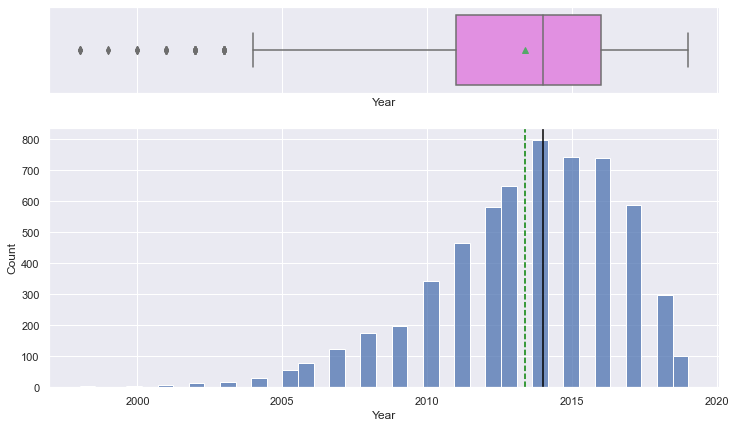

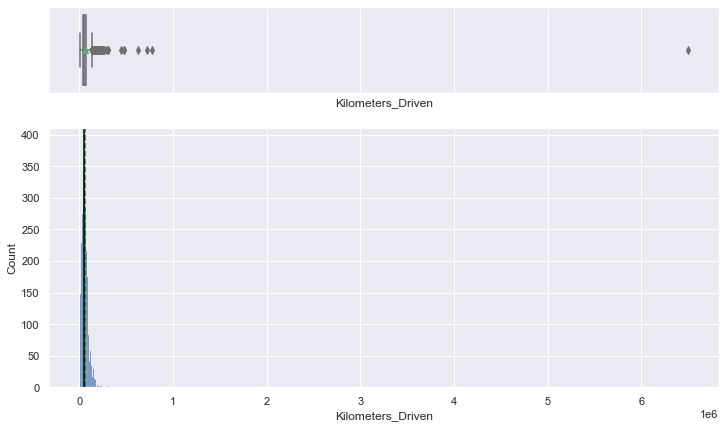

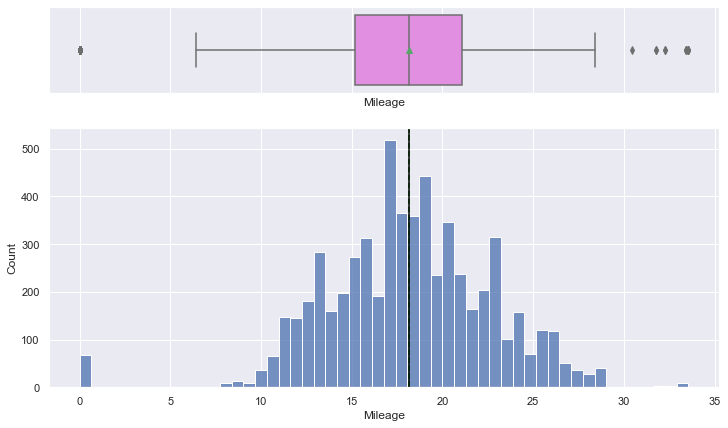

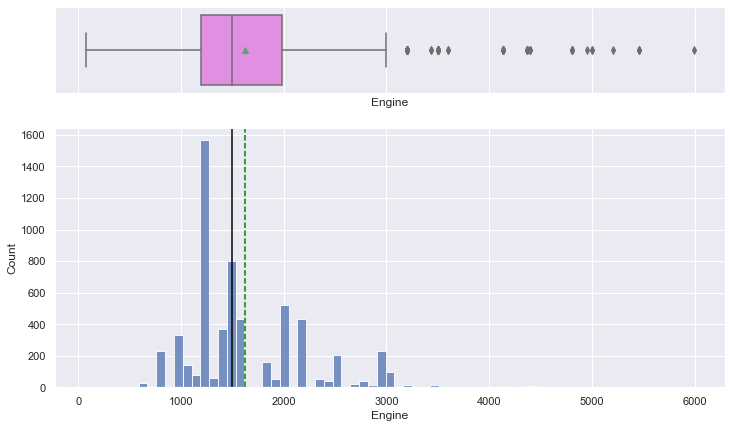

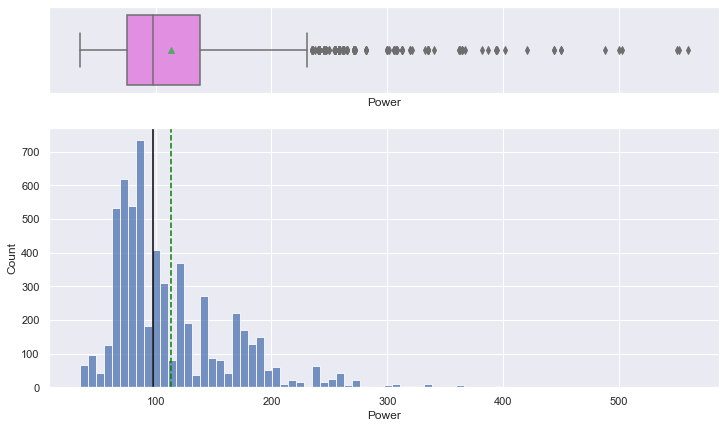

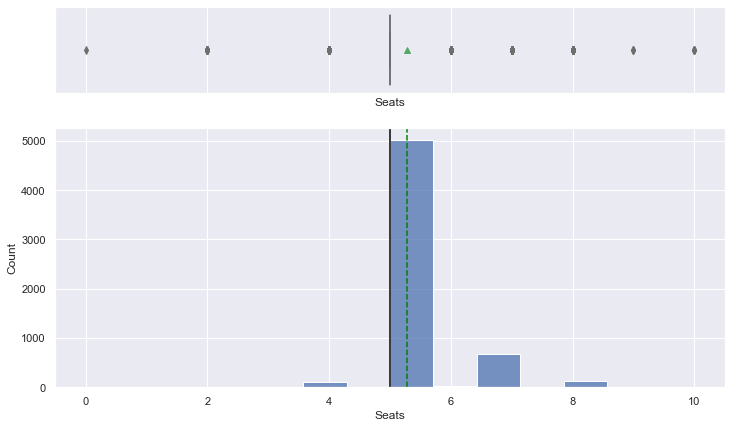

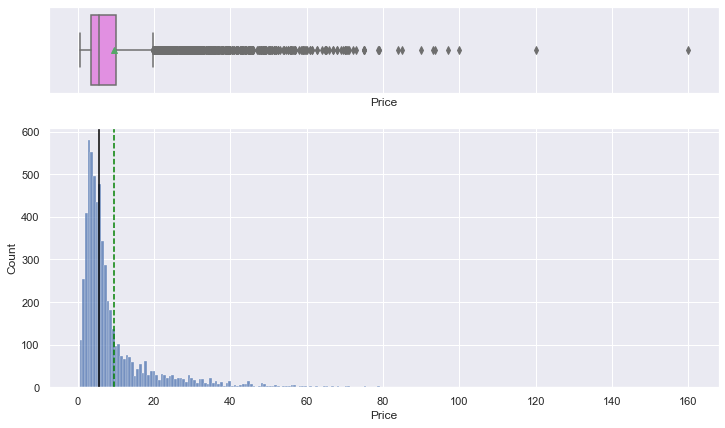

<IPython.core.display.Javascript object>

In [72]:
# creating a list for numerical columns
num_col = ["Year", "Kilometers_Driven", "Mileage", "Engine", "Power", "Seats", "Price"]

# ploting histogram and boxplot for all numerical columns
for col in num_col:
    histogram_boxplot(df, col)

**Observations on univariate analysis of numerical columns**
* Year
  * The distribution is skewed towards left with Outliers in left side.
  * Mean is less than median value.
* Kilometer_Driven
  * The distribution is skewed towards right with outliers, extreme values are seen in outliers.
  * Mean and median values are almost same.
* Mileage
  * The distribution is close to normal with few outliers.
  * Mean and median values are same.
* Engine
  * The distribution is slightly skewed towards right with outliers.
* Power
  * The distribution is skewed towards right. Extreme Outliers are found.
* Seats
  * The distribution is skewed towards right with outliers. Most cars have 5 seats.
* Price
  * The distribution of Price is right skewed with lots of outliers. Extreme outliers are found.
  * Mean is greater than median.

**Let's plot for categorical columns**

In [73]:
# defining function for labeled_barplot for categorical columns
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

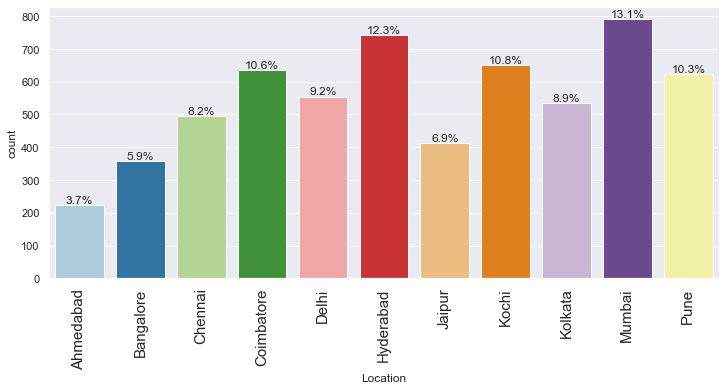

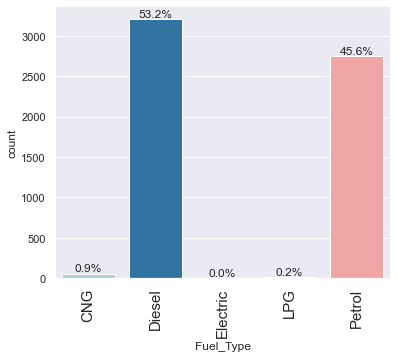

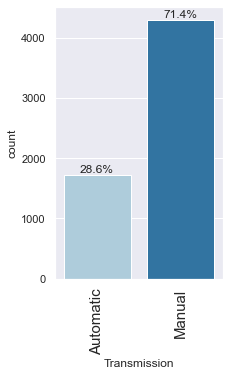

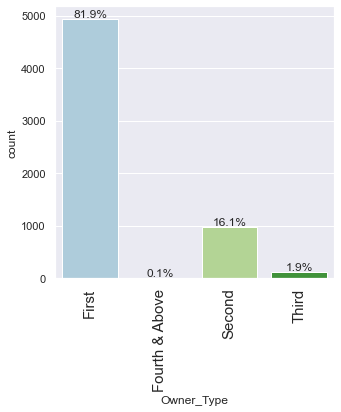

<IPython.core.display.Javascript object>

In [74]:
# creating list for categorical columns
cat_col = ["Location", "Fuel_Type", "Transmission", "Owner_Type"]

# Ploting barplot for all categorical columns
for col in cat_col:
    labeled_barplot(df, col, perc=True)

**Observations on categorical columns**
* Location
  * Mumbai and Hyderabad are the top cities where more cars sold/purchased whereas ahmedabad city where sold/purchased less.
* Fuel_Type
  * Most of the cars which are sold/purchased uses fuel type 'Diesel' and 'Petrol'.
  * Petrol cars are sold less than Diesel cars.
* Transmission
  * Most of the cars sold/purchased having Manual transmission than Automatic transmission. 
  * 71% of the cars have manual transmission whereas only 28% of the cars have automatic transmission.
* Owner_Type
  * More than 80% of the cars sold/purchase has 'First' Owner type.

### Bivariate Analysis

**Correlation Matrix of numerical data**

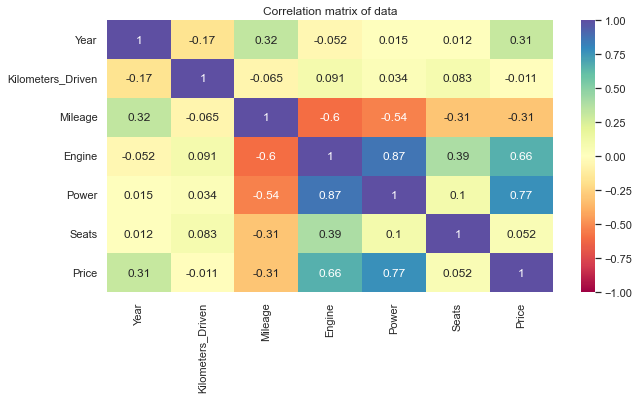

<IPython.core.display.Javascript object>

In [75]:
# Heat map of numerical data
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap="Spectral", vmin=-1, vmax=1)
plt.title("Correlation matrix of data")
plt.show()

**Observations**
* Engine and Power are highly correlated to Price.
* Engine and Power show considerable negative correlation with Mileage.
* Engine shows high correlation with Power.

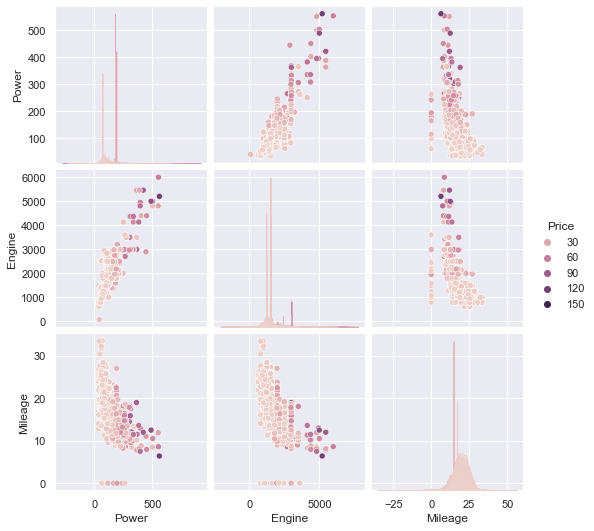

<IPython.core.display.Javascript object>

In [76]:
sns.pairplot(data=df, vars=["Power", "Engine", "Mileage"], hue="Price")

**Observation**
* Price increases when Power and Engine increase.
* Increase in Power and Engine reduces the Mileage with increasing Price.
* Power, Engine and Mileage columns seems to be important for predicting Price.

**Bivariate analysis for Year, Kilometers_Driven and Seats with Price**

**Year with Price column**

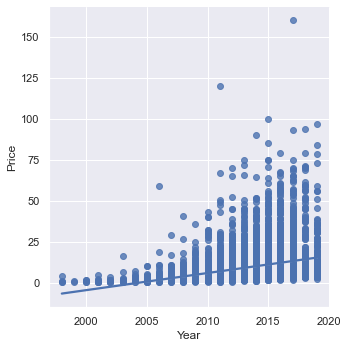

<IPython.core.display.Javascript object>

In [77]:
sns.lmplot(data=df, x="Year", y="Price", ci=False)

**Observations**
* Price of the car increases with year. Newer cars have higher price.
* Most of the cars sold are manufactured in the year between 2011 and 2019.

**Kilometers_Driven with Price column**

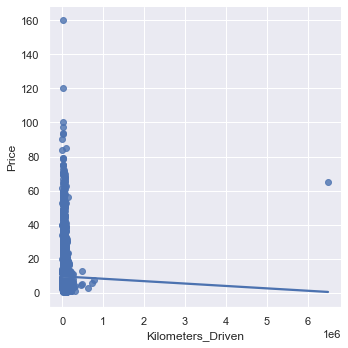

<IPython.core.display.Javascript object>

In [78]:
sns.lmplot(data=df, x="Kilometers_Driven", y="Price", ci=False)

**Observations**
* Price decreases with increase in Kilometers driven.
* It has extreme value as outlier.

**Seats with Price column**

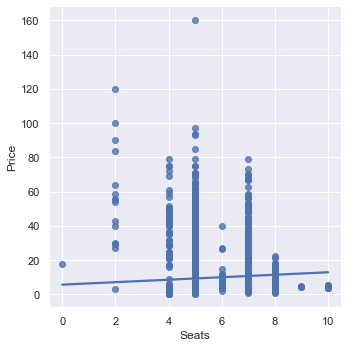

<IPython.core.display.Javascript object>

In [79]:
sns.lmplot(data=df, x="Seats", y="Price", ci=False)

**Observations**
* Price and Seats column shows no correlation.
* Most of the cars with 5 seats, cars with more than 7 seats priced less comparitively.
* Cars with 2 seats priced high.
* Some cars with 5 seats are priced very high.

**Categorical columns with Price**

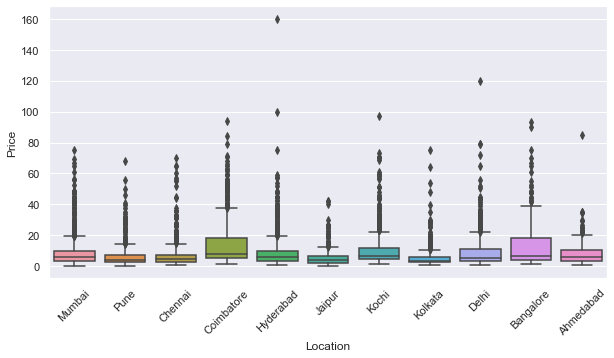

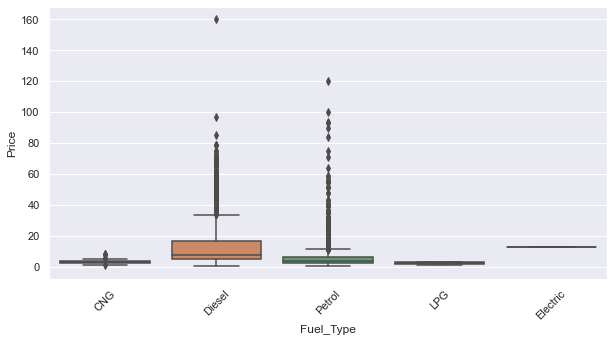

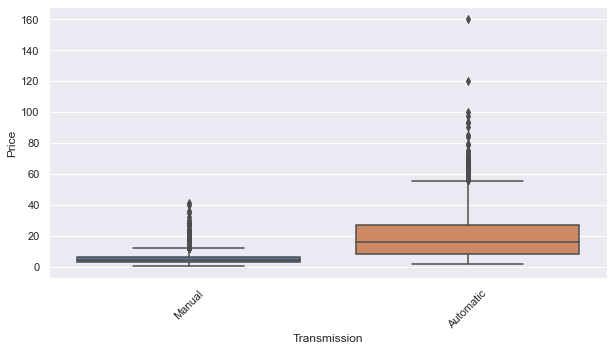

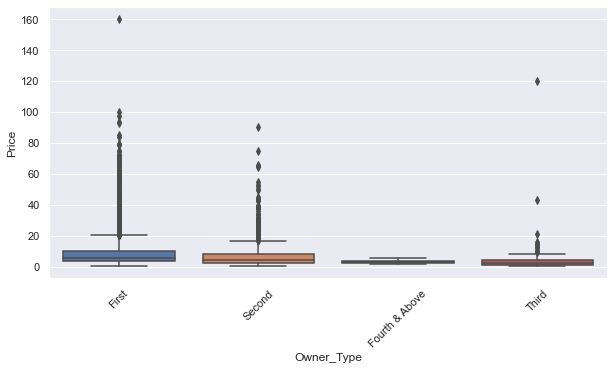

<IPython.core.display.Javascript object>

In [80]:
# Plotting boxplot all categorical column with Price
for col in cat_col:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x=col, y="Price")
    plt.xticks(rotation=45)
    plt.show()

**Observations on categorical columns with Price**
* Location
  * Cars sold in Coimbatore and Bangalore are expensive.
  * Few cars sold in Hyderabad, kochi and Delhi are highly expensive.
* Fuel_Type
  * Diesel type cars are slightly expensive than petrol type.
  * CNG and LPG type cars are sold at affordable price.
* Transmission
  * Automatic cars are priced high with few extremely priced cars.
  * Cars with manual transmission priced less.
* Owner_Type
  * Cars with owner type first and second priced high.

## Missing Value Treatment


In [81]:
# Getting actual number of missing values per column
df.isnull().sum().sort_values(ascending=False)

Power                143
Seats                 42
Engine                36
Mileage                2
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Price                  0
dtype: int64

<IPython.core.display.Javascript object>

**Treating missing values in Mileage column**

In [82]:
# entries with missing mileage
print(df.Mileage.isnull().sum())
df[df.Mileage.isnull()]

2


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4446,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.00
4904,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,12.75


<IPython.core.display.Javascript object>

**Observations**
* There are 2 rows with null values in Mileage column.
* Fuel_Type for both these columns is "Electric".

In [83]:
# fetching all records for Fuel_Type = 'Electric'
df[df.Fuel_Type == "Electric"]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4446,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.00
4904,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,12.75


<IPython.core.display.Javascript object>

**Observations**
* Same records are returned, that means there are only two records with Fuel_Type = 'Electric' and Mielage values are missing for both the records.
* Electic Vehicle mileage cannot be calculated per litre / kg of fuel.
* We can drop these rows as the values are difficult to impute.

In [84]:
# droping rows for null values in Mileage column
df.dropna(subset=["Mileage"], inplace=True)

<IPython.core.display.Javascript object>

In [85]:
# checking for null values now
print(df.Mileage.isnull().sum())
df[df.Mileage.isnull()]

0


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price


<IPython.core.display.Javascript object>

* No missing values in Mileage column
* Mileage column is clean.

In [86]:
# Getting actual number of missing values per column
df.isnull().sum().sort_values(ascending=False)

Power                143
Seats                 42
Engine                36
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Price                  0
dtype: int64

<IPython.core.display.Javascript object>

**Imputing missing values for Power, Seats and Engine columns**
* For a skewed numerical variable, the median of the variable can be used to impute missing values.

In [87]:
# creating list for imputing null values
null_col = ["Power", "Seats", "Engine"]

# Imputing missing values using median of the variable
for col in null_col:
    print(col, "Missing values before imputing is ", df[col].isnull().sum())
    df[col].fillna(df[col].median(), inplace=True)  # median imputation
    print(col, "Missing values after imputing is ", df[col].isnull().sum())
    print("*" * 50)

Power Missing values before imputing is  143
Power Missing values after imputing is  0
**************************************************
Seats Missing values before imputing is  42
Seats Missing values after imputing is  0
**************************************************
Engine Missing values before imputing is  36
Engine Missing values after imputing is  0
**************************************************


<IPython.core.display.Javascript object>

In [88]:
# check for the update in null values
df.isnull().sum().sort_values(ascending=False)

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

<IPython.core.display.Javascript object>

* Data is clean now.

## Outlier Detection and Treatment
#### handling outliers

If we decide that we do actually have some problematic outliers, we have a couple options.

- if the point seems truly nonsensical it may be best to treat it as missing

- alternatively, we could drop that observation or we could use statistics that are robust to outliers

It's often a good idea to examine the sensitivity to outliers by running an analysis with and without them.

**Outliers treatment for Power**


In [90]:
# calculating IQR and upper whisker 4iqr for Power column
quartiles = np.quantile(df["Power"][df["Power"].notnull()], [0.25, 0.75])
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}")
outlier_powers = df.loc[
    np.abs(df["Power"] - df["Power"].median()) > power_4iqr, "Power"
]
outlier_powers

Q1 = 78.0, Q3 = 138.03, 4*IQR = 240.12


70      500.00
134     362.07
148     444.00
152     362.90
418     367.00
589     364.90
1930    364.90
2095    362.07
2100    550.00
2978    394.30
3132    340.00
3341    402.00
4061    444.00
4342    364.90
4451    395.00
4627    450.00
4691    421.00
4722    387.30
4821    450.00
5088    503.00
5341    382.00
5521    552.00
5603    394.30
5781    560.00
5919    488.10
Name: Power, dtype: float64

<IPython.core.display.Javascript object>

In [91]:
len(outlier_powers)

25

<IPython.core.display.Javascript object>

* The upper whiker 4*IQR value of power is 240bhp. The values more than this considered as outliers.
* After applying IQR on power column, we got 25 outliers.
* We can drop the outliers for better model.

In [92]:
# dropping these rows
df.drop(outlier_powers.index, axis=0, inplace=True)

<IPython.core.display.Javascript object>

**Outliers treatment for Engine**

In [93]:
# calculating IQR and upper whisker 4iqr for Engine column
quartiles_engine = np.quantile(df["Engine"][df["Engine"].notnull()], [0.25, 0.75])
engine_4iqr = 4 * (quartiles_engine[1] - quartiles_engine[0])
print(f"Q1 = {quartiles_engine[0]}, Q3 = {quartiles_engine[1]}, 4*IQR = {engine_4iqr}")
outlier_engine = df.loc[
    np.abs(df["Engine"] - df["Engine"].median()) > engine_4iqr, "Engine"
]
outlier_engine

Q1 = 1198.0, Q3 = 1968.0, 4*IQR = 3080.0


Series([], Name: Engine, dtype: float64)

<IPython.core.display.Javascript object>

* The outliers are treated using IQR method.

**Outliers treatment for Kilometers_Driven**

In [94]:
# # calculating IQR and upper whisker 4iqr for kilometers_driven column
quartiles_kmd = np.quantile(
    df["Kilometers_Driven"][df["Kilometers_Driven"].notnull()], [0.25, 0.75]
)
kmd_4iqr = 4 * (quartiles_kmd[1] - quartiles_kmd[0])
print(f"Q1 = {quartiles_kmd[0]}, Q3 = {quartiles_kmd[1]}, 4*IQR = {kmd_4iqr}")
outlier_kmd = df.loc[
    np.abs(df["Kilometers_Driven"] - df["Kilometers_Driven"].median()) > kmd_4iqr,
    "Kilometers_Driven",
]
outlier_kmd

Q1 = 34000.0, Q3 = 73000.0, 4*IQR = 156000.0


29       262000
77       230000
181      216000
340      775000
358      620000
838      215000
1068     225000
1101     248000
1442     231673
1528     299322
1766     220000
1846     255000
1860     720000
1975     282000
2267     215750
2328    6500000
2346     234000
2823     480000
2988     240000
3092     480000
3649     300000
3713     232000
3894     250000
4491     445000
4719     250000
4792     242000
5647     227000
5800     210000
5834     250000
Name: Kilometers_Driven, dtype: int64

<IPython.core.display.Javascript object>

In [95]:
len(outlier_kmd)

29

<IPython.core.display.Javascript object>

* Upper whisker value of kilometers driven column is 156000. Few cars are driven more than 156000 km.
* After applying IQR, we got 29 outliers in kilometers column.
* One of the car driven is 65 lakh, we should check for that value.
* High values in outlier will impact our model.
* we can drop the outliers in kilometers column

In [96]:
# drop these rows
df.drop(outlier_kmd.index, axis=0, inplace=True)

<IPython.core.display.Javascript object>

**Outliers treatment for Year**

In [97]:
# # calculating IQR and upper whisker 4iqr for year column
quartiles_year = np.quantile(df["Year"][df["Year"].notnull()], [0.25, 0.75])
year_4iqr = 4 * (quartiles_year[1] - quartiles_year[0])
print(f"Q1 = {quartiles_kmd[0]}, Q3 = {quartiles_year[1]}, 4*IQR = {year_4iqr}")
outlier_year = df.loc[
    np.abs(df["Year"] - df["Year"].median()) > year_4iqr, "Year",
]
outlier_year

Q1 = 34000.0, Q3 = 2016.0, 4*IQR = 18.0


Series([], Name: Year, dtype: int64)

<IPython.core.display.Javascript object>

* All outliers are within the range after applying IQR.


## Feature Engineering

Engine, Power and Mileage are important factors for performance, we can create a metric using these columns

In [98]:
# create a copy of dataset
df1 = df.copy()

# creating new column Performance_measure with average of Mileage, Engine and Power
df1["Performance_measure"] = (df1["Mileage"] + df1["Engine"] + df1["Power"]) / 3
df1.drop(["Mileage", "Engine", "Power"], axis=1, inplace=True)
np.random.seed(1)
df1.sample(10)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Performance_measure
4183,Chennai,2012,120000,Diesel,Manual,Second,5.0,2.60,448.100000
4140,Ahmedabad,2015,20000,Petrol,Manual,First,5.0,2.66,296.766667
5490,Pune,2013,57000,Diesel,Manual,First,5.0,4.61,520.266667
1009,Hyderabad,2014,81000,Diesel,Manual,First,5.0,6.10,449.066667
5967,Bangalore,2014,42000,Petrol,Manual,Second,7.0,5.94,494.240000
2420,Pune,2014,102000,Diesel,Automatic,Second,7.0,16.50,1054.350000
3295,Delhi,2013,62000,CNG,Manual,First,5.0,2.80,360.920000
4086,Pune,2015,65000,Diesel,Manual,First,7.0,15.00,869.196667
3821,Jaipur,2005,49000,Petrol,Manual,First,5.0,0.90,287.333333
774,Ahmedabad,2013,94000,Diesel,Manual,First,8.0,8.85,869.600000


<IPython.core.display.Javascript object>

**Check the histogram and boxplot of new variable**

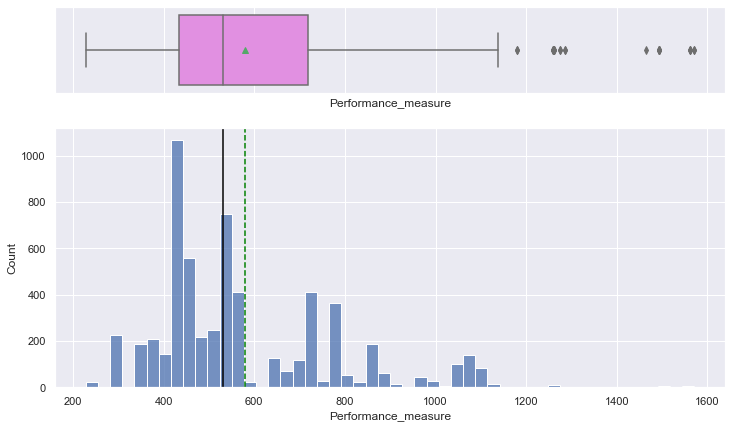

<IPython.core.display.Javascript object>

In [99]:
# histogram and boxplot
histogram_boxplot(df1, "Performance_measure", bins=50)

* The distribution is slightly right skewed.
* Mean is slightly higher than median.
* Performance column helping to reduce the number of variables in our data.
* We already treated outliers for individual columns, so we can use performance column for our model building.

## Model Building

**Split Data**

In [100]:
# lets build our linear model
# independant variables

# independent variables list
X = df1.drop(["Price"], axis=1)

# dependent variables list
y = df1[["Price"]]

<IPython.core.display.Javascript object>

**Encode categorical variables by creating dummy variables**

In [101]:
# define a function for encoding
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x


# independent variables with encoded categorical variables
X_num = encode_cat_vars(X)
X_num.head()

,Year,Kilometers_Driven,Seats,Performance_measure,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,5.0,360.920000,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,2015,41000,5.0,575.956667,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0
2,2011,46000,5.0,435.300000,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,2012,87000,7.0,452.510000,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,2013,40670,5.0,708.000000,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [102]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(
    X_num, y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [104]:
# Check the shape of train and test sets
# print number of rows in train and test sets
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 4174
Number of rows in test data = 1789


<IPython.core.display.Javascript object>

**Fit Linear Model**

In [105]:
# apply linear regression model on the training set
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

Here are the coefficients for each variable and the intercept

In [108]:
# compute the coefficients and intercept of the model
coef_df = pd.DataFrame(
    np.append(regression_model.coef_.flatten(), regression_model.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
Year,0.754940
Kilometers_Driven,-0.000056
Seats,-2.258980
Performance_measure,0.033437
Location_Bangalore,2.444411
Location_Chennai,1.251046
Location_Coimbatore,3.014585
Location_Delhi,0.367420
Location_Hyderabad,2.164727
Location_Jaipur,1.597308


<IPython.core.display.Javascript object>

**Observations on coefficients of the model**
* The coefficients of Year, Performance model, locations(except mumbai and kolkata), Fuel type LPG, Owner type (except second) columns are **positive**.
   * **Increase in these positive coefficients columns** will lead to an **increase in the Price**. 

* The coefficients of Kilometers_Driven, Seats, locations of mumbai and kolkata, Fuel type(except LPG), Transmission, Owner type second columns are **negative**
   * **Increase in these positive coefficients columns** will lead to a **decrease in the Price**.

## Test the performance of model on Train and Test Data

**We will use the metric functions from sklearn for RMSE, MAE, and  R^2**

In [109]:
# defining the functions and use the same to compute and print these values at once

# Adjusted R^2
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Model performance check
def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values

    return pd.DataFrame(
        {
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "MAE": mean_absolute_error(y_act, y_pred),
            "R^2": r2_score(y_act, y_pred),
            "Adjusted R^2": adj_r2(inp, y_act, y_pred),
        },
        index=[0],
    )

<IPython.core.display.Javascript object>

In [110]:
# Checking model performance on train set
print("Training Performance:\n")
print(model_perf(regression_model, X_train, y_train))

# Checking model performance on test set
print("\n\nTest Performance:\n")
print(model_perf(regression_model, X_test, y_test))

Training Performance:

       RMSE       MAE       R^2  Adjusted R^2
0  6.110929  3.896068  0.683566      0.681966


Test Performance:

       RMSE       MAE       R^2  Adjusted R^2
0  6.659962  3.952729  0.600098      0.595346


<IPython.core.display.Javascript object>

**Observations on model performance**

* The train and test  R2  are 0.68 and 0.60, indicating that the model explains 68% and 60% of the total variation in the train and test sets respectively. Also, both scores are comparable.
* RMSE values on the train and test sets are also comparable.
* This shows that the model is not overfitting.
* MAE indicates that our current model is able to predict price within a mean error of 3.95 on the test set.

## Actionable Insights & Recommendations

**Conclusion**
* We have been able to build a predictive model that can be used by business to predict the price of an used car with an  R2  of 0.683 on the training set.
* Business can use this model to predict the price within a mean error of 3.95 on the test set.
* Performance_Measure and Fuel_Type are the parameters effecting the price positively.
* Transmission, Seats, Kilometers_Driven are the parameters effecting the price negatively.

**All the key questions are answered in conclusion.**